**Team Members:**

Addepalli Sai Srinivas - 2023DA04564

Saurabh Singh - 2023DA04002

Manav V Shenoy - 2023da04246

Sachindra Kumar Singh - 2022dc04511

Sonia Benny Thomas - 2023DA04169



**Assignment:**

Assignment Set 3 (Customer Financial Data Analysis)

# Assignment Part 1

#1. Import Libraries/Dataset

Importing Libraries

In [ ]:
# Loading all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

Download the dataset

In [ ]:
# Reading the dataset
df = pd.read_csv("Customer_Financial_Info.csv")

# 2. Data Visualization and Exploration

First 2 rows for sanity check to identify all the features present in the dataset and if
the target matches with them

In [ ]:
# Print first 2 rows of data
df.head(2)

,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


Data visualizations to get an insight about the dataset.

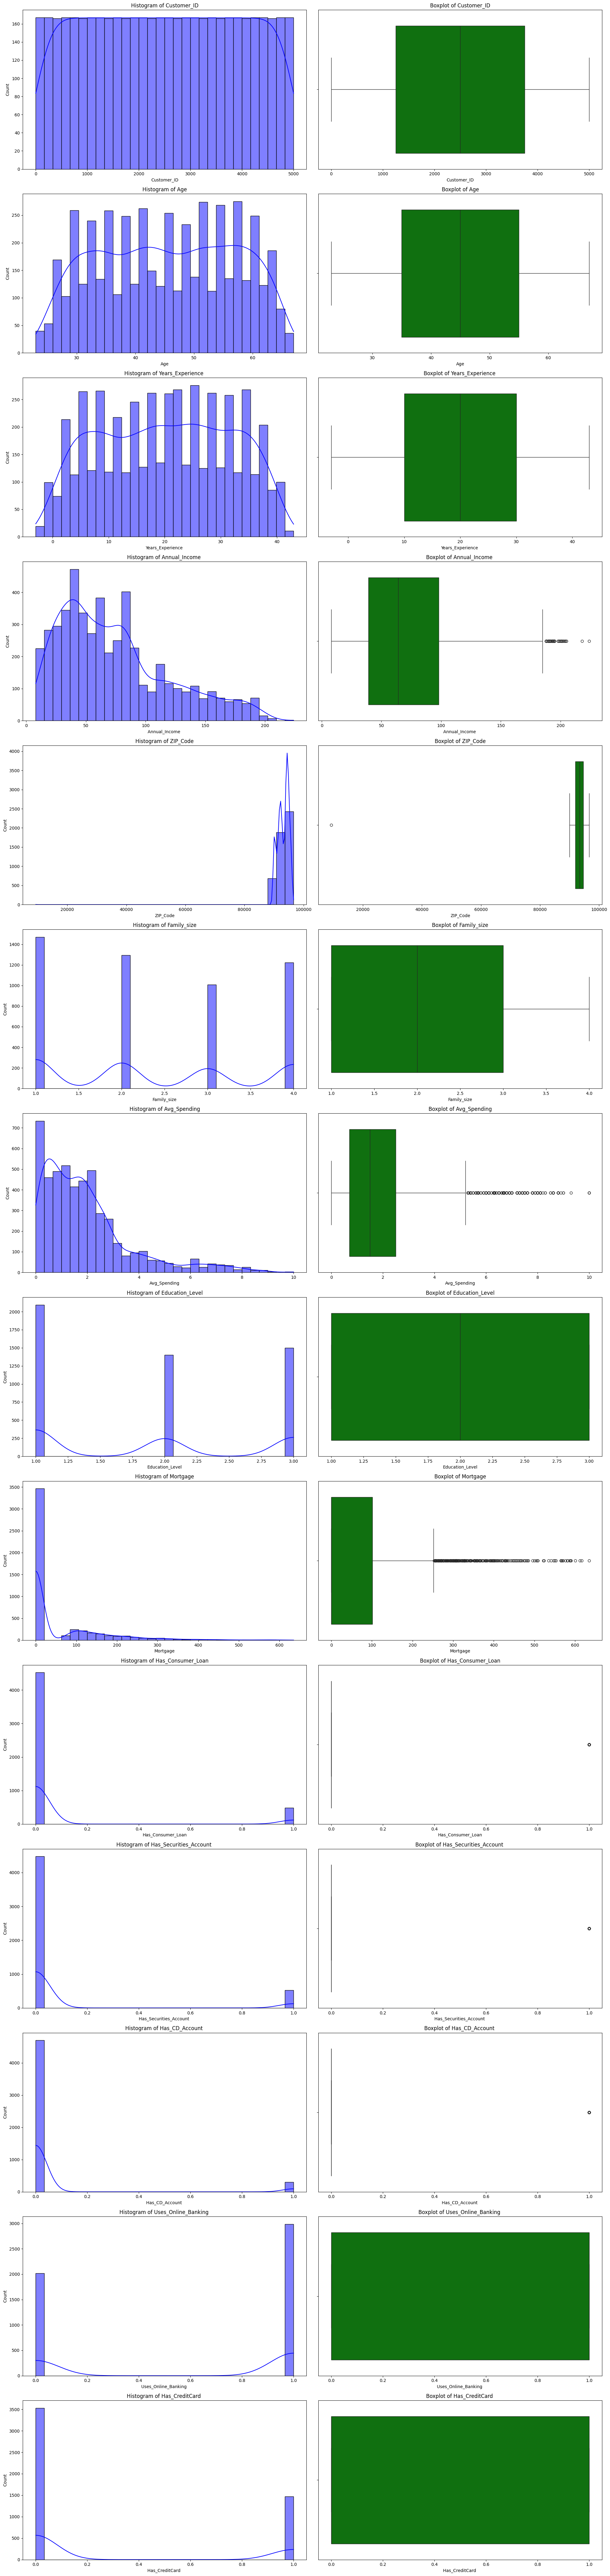

In [ ]:
# Selecting the columns that are float and int
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# descibing the plot size
plt.figure(figsize=(20, len(numeric_columns) * 6))

# Loop through the columns and plot the data of that particular column
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 2, 2*i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue') # histogram plot
    plt.title(f'Histogram of {col}')
    plt.subplot(len(numeric_columns), 2, 2*i+2)
    sns.boxplot(x=df[col], color='green') # box plot
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Correlational analysis on the dataset and the effect on feature selection

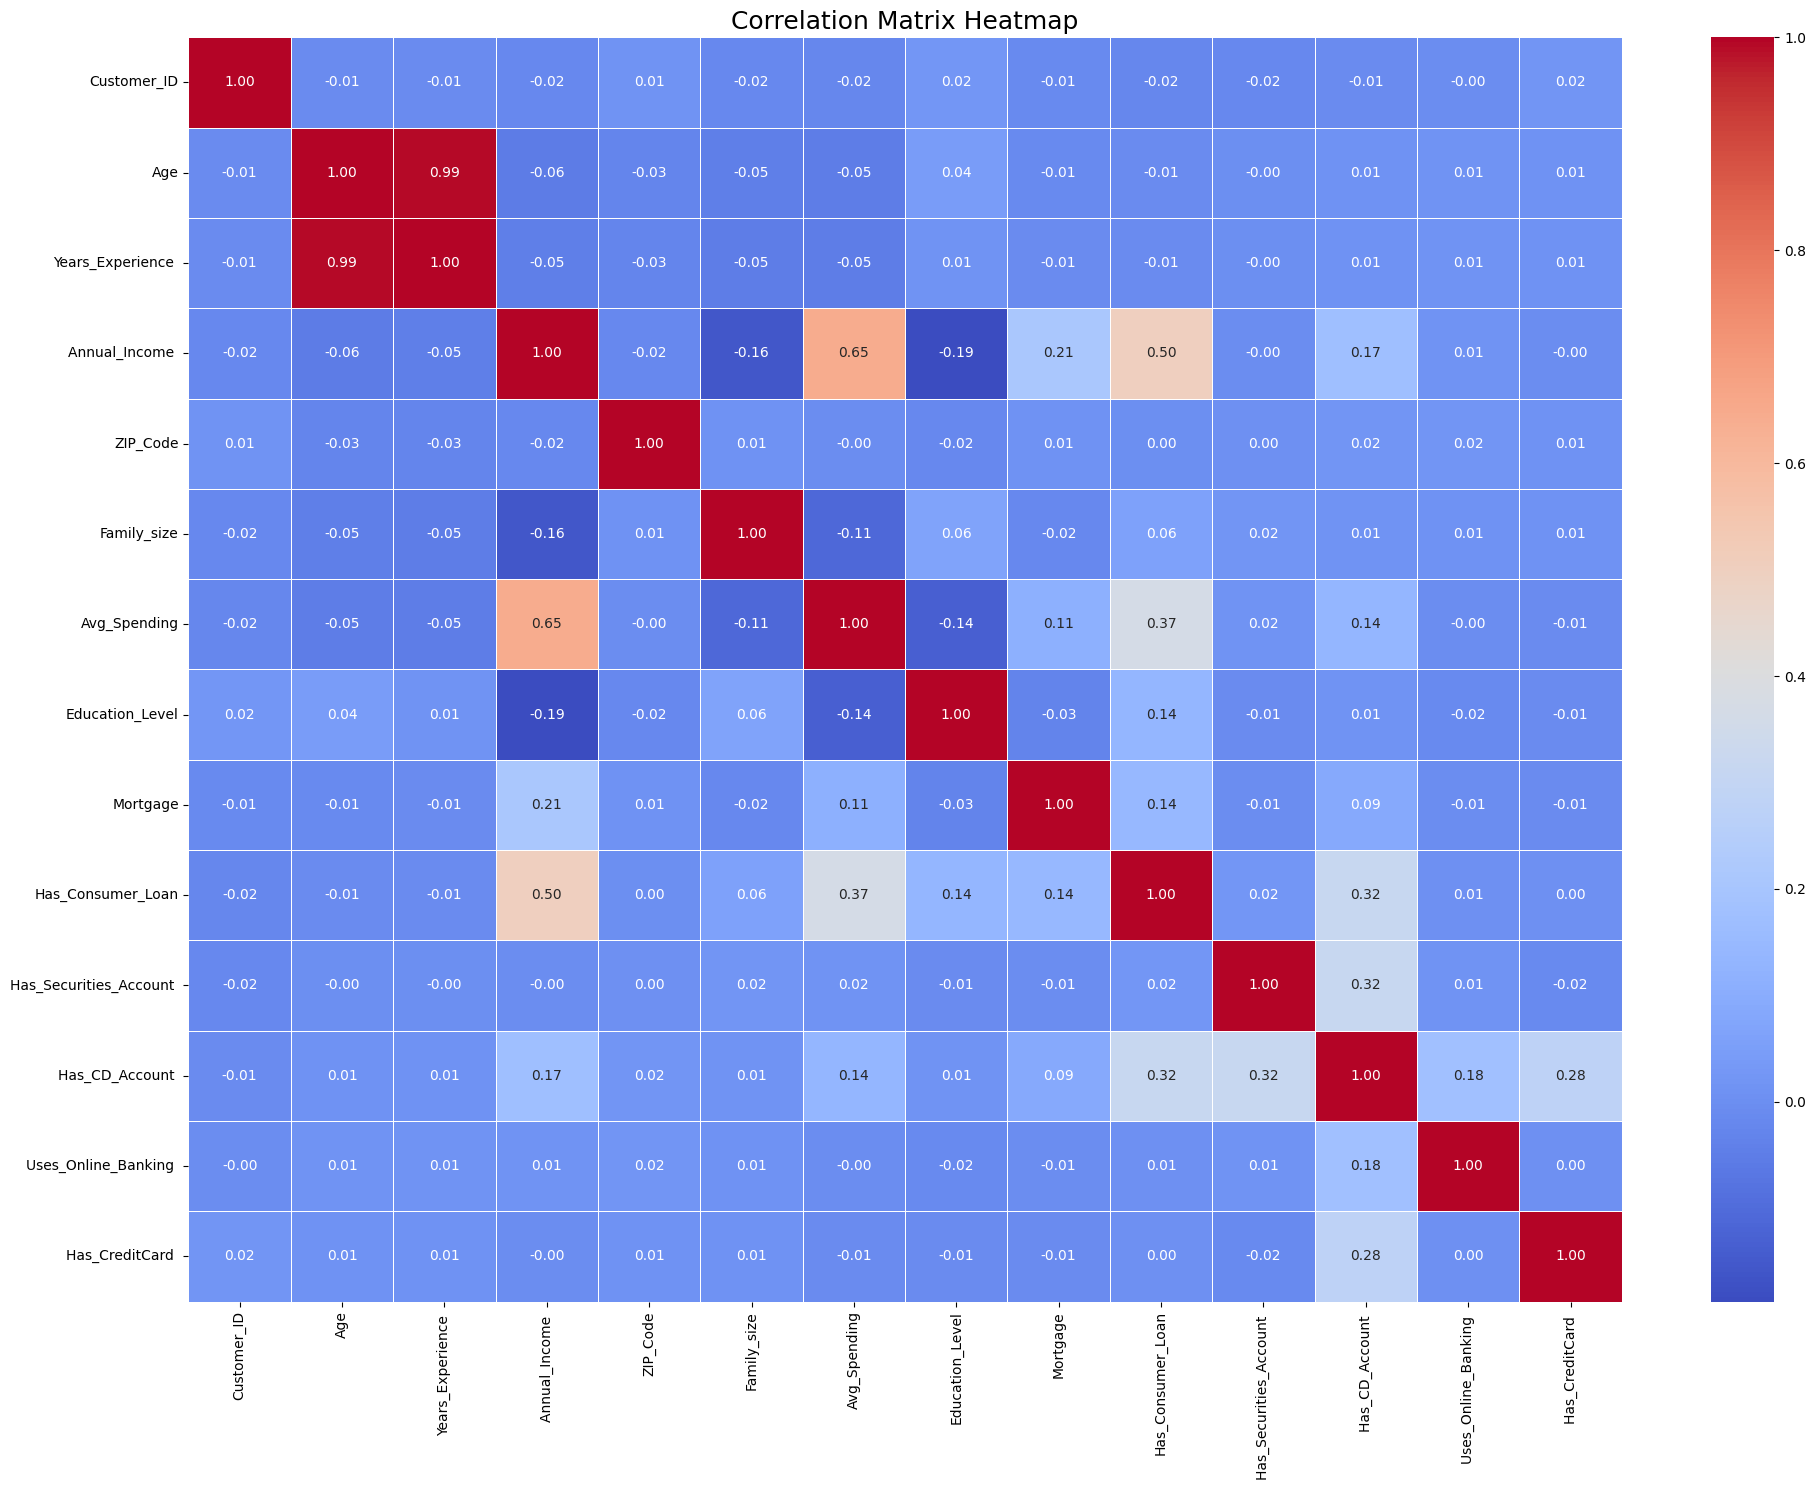

In [ ]:
# Checking the correaltion matrix

correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) # heatmap with cool warm colur for visulization
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.tight_layout()
plt.show()

Correlation analysis plays an important role in feature selection in the next step of your machine learning pipeline. This is becuase


*   Highly correlated features often carry redundant information. If two features have a high correlation, they provide similar predictive power, so you may want to remove one of them to reduce multicollinearity.
*   By looking at the correlation between features and the target variable (if included), you can identify which features are more important for predicting the target. Features with a higher correlation to the target variable are more likely to contribute to the model’s predictive power.

For example, age and years of experience has a correlation of 0.9, hence it might be better to remove one of them.


# 3. Data Pre-processing and cleaning

Dataset Before Pre-Processing and Cleaning

In [ ]:
# print first 5 rows of data
df.head(5)

,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Pre-processing steps performed like identifying NULL or Missing
Values if any, handling of outliers if present in the dataset, skewed data etc.

**Pre-Processing Steps:**


*   Checking for missing or Null values: None were found in the dataset.
*   Checking for Outliers in the dataset. Used the interquartile range to define the normal range. Any value falling outside this range, is an outlier. The acceptable range is between Q1 - 1.5 x IQR (lower_bound) and Q3 + 1.5 x IQR (upper_bound) where IQR = Q3 - Q1 and Q3 is the 75th percentile and Q1 is the 25th percentile
*   Checking for columns with skewed data
*   Dropping Columns such as Customer_ID as it's unique and wouldn't help improve the model




The following **feature engineering techniques** were used.



*   Columns with large ranges were **normalized** using the **Min-Max Normalization** method to a range of 0-1. This Ensures that features contribute equally to the model and prevents features with large ranges from dominating the learning process, and improves the overall performance of the model
*   Columns with high skewness were **transformed** using the **Log Transformation** method to reduce skewness. This mproves the normality of the data, which can help linear models and other algorithms that assume normally distributed features.

**Feature Selection Methods**


*   Using the correlation analysis. Highly correlated features often carry redundant information. If two features have a high correlation, they provide similar predictive power, hence one needs to be removed to reduce multicollinearity. For example, age and years of experience has a correlation of 0.9, hence the column-age will be removed.
*   Using Anove F-value to rank the columns based on the most important ones. The ANOVA F-value is used to assess the relevance of each feature with respect to the target variable and pick the top N columns, N can be configurable.












  



In [ ]:
#Code Cell Description: To detect columns with high number of missing values

missing_values_count = df.isnull().sum()
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100
missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})
# missing_summary = missing_summary[missing_summary['Missing Values Count'] > 0]
missing_summary = missing_summary.sort_values(by='Missing Values Percentage', ascending=False)
print(missing_summary)

                         Missing Values Count  Missing Values Percentage
Customer_ID                                 0                        0.0
Age                                         0                        0.0
Years_Experience                            0                        0.0
Annual_Income                               0                        0.0
ZIP_Code                                    0                        0.0
Family_size                                 0                        0.0
Avg_Spending                                0                        0.0
Education_Level                             0                        0.0
Mortgage                                    0                        0.0
Has_Consumer_Loan                           0                        0.0
Has_Securities_Account                      0                        0.0
Has_CD_Account                              0                        0.0
Uses_Online_Banking                         0      

In [ ]:
#Code Cell Description: To identify and remove instances that have a high number of outliers

# function to identify the number of outliers
def identify_outliers(column):
    Q1 = column.quantile(0.25) # Q1
    Q3 = column.quantile(0.75) # Q3
    IQR = Q3 - Q1 # inter quartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return lower_bound, upper_bound, outliers.sum()  # Return bounds and count of outliers

# function to remove outliers
def remove_outliers(df, numeric_columns):
    for col in numeric_columns:
        lower_bound, upper_bound, _ = identify_outliers(df[col])
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Selecting the columns that are float and int
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_count = {}
# loop through the columns to identify outliers
for col in numeric_columns:
    _, _, count = identify_outliers(df[col])
    outliers_count[col] = count

# dataframe of outliers from diff columns
outliers_summary = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Outliers Count'])
high_outliers = outliers_summary[outliers_summary['Outliers Count'] > 5]

print("All Outliers Summary:")
print(outliers_summary)
print("\nColumns with High Number of Outliers:")
print(high_outliers)

df = remove_outliers(df, numeric_columns)

All Outliers Summary:
                     Column  Outliers Count
0               Customer_ID               0
1                       Age               0
2         Years_Experience                0
3            Annual_Income               96
4                  ZIP_Code               1
5               Family_size               0
6              Avg_Spending             324
7           Education_Level               0
8                  Mortgage             291
9         Has_Consumer_Loan             480
10  Has_Securities_Account              522
11          Has_CD_Account              302
12     Uses_Online_Banking                0
13          Has_CreditCard                0

Columns with High Number of Outliers:
                     Column  Outliers Count
3            Annual_Income               96
6              Avg_Spending             324
8                  Mortgage             291
9         Has_Consumer_Loan             480
10  Has_Securities_Account              522
11          Has

In [ ]:
#Code Cell Description: To detect columns that have high ranges so that they can be normalized. And to detect columns with high skew so that they can be handled.

# function to detect if any column requires to be normalized
def detect_normalization_needed(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    skewness = df[numeric_columns].apply(lambda x: skew(x.dropna())) # checking skewness (Standard Scalar)
    high_skew_columns = skewness[abs(skewness) > 1].index
    std_dev = df[numeric_columns].std() # checking standard deviation for high range columns (min max scalar)
    high_range_columns = std_dev[std_dev > 1].index

    return high_skew_columns, high_range_columns

# check and get columns for normalizations
high_skew_columns, high_range_columns = detect_normalization_needed(df)

# defining normalization Techniques
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Normalizig the columns

for col in high_skew_columns:
    df[col] = np.log1p(df[col])

for col in high_range_columns:
    df[[col]] = min_max_scaler.fit_transform(df[[col]])
print("Columns with high skewness transformed:", high_skew_columns)
print("Columns with large range normalized:", high_range_columns)
df = df.drop(["Age","Customer_ID","ZIP_Code"], axis=1)

Columns with high skewness transformed: Index(['Mortgage'], dtype='object')
Columns with large range normalized: Index(['Customer_ID', 'Age', 'Years_Experience ', 'Annual_Income ', 'ZIP_Code',
       'Family_size', 'Avg_Spending', 'Mortgage'],
      dtype='object')


In [ ]:
#Code Cell Description: Using Anove F-value to detect most prominent columns

# defining input and output data
X = df.drop(columns=['Has_CreditCard ']) # input data
y = df['Has_CreditCard '] # output label

if X.isnull().sum().sum() > 0:
    print("Warning: Missing values found in the DataFrame. Consider imputing or dropping them.")

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) != X.shape[1]:
    print("Warning: Non-numeric columns found. Ensure all features are numeric for ANOVA.")

# selecting the most prominent features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = selector.scores_
p_values = selector.pvalues_
features_summary = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': feature_scores,
    'P-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("Feature Scores and P-Values:")
print(features_summary)
num_features_to_select = 3
top_features = features_summary.head(num_features_to_select)['Feature']
df = X[top_features]

Feature Scores and P-Values:
                   Feature   F-Value   P-Value
4          Education_Level  1.674502  0.195739
9     Uses_Online_Banking   0.774571  0.378865
1           Annual_Income   0.422054  0.515955
2              Family_size  0.362410  0.547208
0        Years_Experience   0.288985  0.590905
5                 Mortgage  0.026603  0.870446
3             Avg_Spending  0.002401  0.960922
6        Has_Consumer_Loan       NaN       NaN
7  Has_Securities_Account        NaN       NaN
8          Has_CD_Account        NaN       NaN


Dataset after pre-processing and cleaning

In [ ]:
df.head(5)

,Education_Level,Uses_Online_Banking,Annual_Income
2,1,0,0.016949
3,2,0,0.519774
4,2,0,0.209040
5,2,1,0.118644
6,2,1,0.361582


# 4. Model Building

The primary purpose of splitting the data is to evaluate the performance of the
model. The training set is used to fit the model, while the test set is used to assess how well the model generalizes to new data.


By keeping a separate test set,the model's performance is not just a result of memorizing the training data but can be generalized. This prevents overfitting.


It also helps in paramerter tuning and comparing the performance of multiple models.



In [ ]:
#Code Cell Description: Building Logistic Regression and Decision Tree Models. Grid Search is used to find optimal parameter combination.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data into traina and test (80: 20)
log_reg = LogisticRegression(max_iter=200, random_state=42) # define logistic regression
dt = DecisionTreeClassifier(random_state=42) # define Decision Tree

# parameters for hyper parameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Grid search to find best hyper parameters for Decision tree
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train) # Grid search finds best hyper parameters on train data

# results of hyper parameter tuning
best_dt = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters for Decision Tree:", best_params,"\n")

# define scoring paramters (weighted average method - to handle class imbalance)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# 5 fold cross validation of train data for Logistic regression
log_reg_accuracy = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
log_reg_f1 = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Decision Tree using results of hyper parameter tuning
best_dt_accuracy = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='accuracy')
best_dt_f1 = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='f1_weighted')

# Training Logistic regreesion and decision Tree on train data
log_reg.fit(X_train, y_train)
best_dt.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2} 



DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=42)



The Ideal conditions for the decision tree was found to be as below
*   criterion='entropy': Uses entropy to measure the quality of a split.
*   max_depth=10: Limits the maximum depth of the tree to 10 levels.
*   min_samples_leaf=1: Specifies the minimum number of samples required to be at a leaf node.
*   min_samples_split=5: Specifies the minimum number of samples required to split an internal node.

These conditions were chosen because this combination yielded the best results after performing cross validation to evaluate the model's performance.
The combination of hyperparameters that yields the best average performance across the folds is chosen as the optimal set.








Running the same code but with different train-test-split ration (70-30)

# 5. Performance Evaluation

In [ ]:
#Code Cell Description: Compare Performance of Logisitc Regression and Decision Tree models.

# Getting the results of Trained Models on test data
log_reg_test_score = log_reg.score(X_test, y_test) # logistic regression results on test data
best_dt_test_score = best_dt.score(X_test, y_test) # Decision Tree results on test data

# DataFrame summary of performance metrics comparing Logistic Regression and Decision Tree
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree (Best Params)'],
    'CV Accuracy Mean': [np.mean(log_reg_accuracy), np.mean(best_dt_accuracy)],
    'CV Accuracy Std': [np.std(log_reg_accuracy), np.std(best_dt_accuracy)],
    'CV F1 Score Mean': [np.mean(log_reg_f1), np.mean(best_dt_f1)],
    'CV F1 Score Std': [np.std(log_reg_f1), np.std(best_dt_f1)],
    'Test Accuracy': [log_reg_test_score, best_dt_test_score]
})

print(results)

                         Model  CV Accuracy Mean  CV Accuracy Std  \
0          Logistic Regression          0.712414         0.000690   
1  Decision Tree (Best Params)          0.674483         0.009018   

   CV F1 Score Mean  CV F1 Score Std  Test Accuracy  
0          0.592770         0.000909       0.703448  
1          0.614874         0.007703       0.662069  




*   Logistic Regression has a higher CV Accuracy Mean (0.7124) compared to the Decision Tree (0.6745). This suggests that on average, Logistic Regression performs better across different cross-validation splits, indicating better generalization performance.
*   The standard deviation of Logistic Regression (0.00069) is much lower than that of the Decision Tree (0.00902). This means that Logistic Regression is more consistent in its performance across different cross-validation splits, whereas the Decision Tree shows more variability and is less stable.
* The F1 Score Mean for the Decision Tree (0.6149) is slightly higher than for Logistic Regression (0.5928). F1 score balances precision and recall, so the Decision Tree might handle imbalanced data better or perform better in terms of balancing false positives and false negatives
* Logistic Regression again outperforms the Decision Tree with a higher Test Accuracy (0.7034 vs. 0.6621), meaning that Logistic Regression performs better on the unseen test data

Logistic Regression is better overall due to its higher accuracy, both in cross-validation and on the test set. It also has a lower standard deviation, meaning it performs more consistently across different data splits.
Decision Tree, while having a slightly better F1 score, is less consistent and has lower overall accuracy. It may be more suitable if you prioritize balancing precision and recall in scenarios like imbalanced datasets.





# Repeating the task with a different train-test split ratio (70-30)

In [ ]:
#Code Cell Description: Re-training and predicting with new train-test-split ratio (training - 70% and testing - 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # split the data into traina and test (70: 30)

log_reg = LogisticRegression(max_iter=200, random_state=42) # defining Logistic Regression

dt = DecisionTreeClassifier(random_state=42) # defining Decision Tree

# defining different parameters of hyper parameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# grid search to find best hyper parameters for decision Tree
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train) # run train data to find best hyper parameters

# results of hyper parameter tuning
best_dt = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters for Decision Tree:", best_params,"\n")

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# 5 fold cross validation of train data for Logistic regression
log_reg_accuracy = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
log_reg_f1 = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Decision Tree using best hyper parameters
best_dt_accuracy = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='accuracy')
best_dt_f1 = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='f1_weighted')

# Traing the models on Train Data
log_reg.fit(X_train, y_train) # Training Logistic Regression
best_dt.fit(X_train, y_train) # Training Decision Tree

# Evaluating and scoring the model on Test Data
log_reg_test_score = log_reg.score(X_test, y_test) # Score of Logistic Regression
best_dt_test_score = best_dt.score(X_test, y_test) # Score of Decision Tree

# DataFrame summary of performance metrics comparing Logistic Regression and Decision Tree
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree (Best Params)'],
    'CV Accuracy Mean': [np.mean(log_reg_accuracy), np.mean(best_dt_accuracy)],
    'CV Accuracy Std': [np.std(log_reg_accuracy), np.std(best_dt_accuracy)],
    'CV F1 Score Mean': [np.mean(log_reg_f1), np.mean(best_dt_f1)],
    'CV F1 Score Std': [np.std(log_reg_f1), np.std(best_dt_f1)],
    'Test Accuracy': [log_reg_test_score, best_dt_test_score]
})

print(results)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5} 

                         Model  CV Accuracy Mean  CV Accuracy Std  \
0          Logistic Regression          0.709500         0.000685   
1  Decision Tree (Best Params)          0.674037         0.014695   

   CV F1 Score Mean  CV F1 Score Std  Test Accuracy  
0          0.588933         0.000901       0.713235  
1          0.621130         0.020374       0.689338  


# Assignment Part 2

# 1)	Model Building

In [ ]:
#Code Cell Description: Building the model with KNN, Naive Bayes, Random Forest and Adaboost

# split the data into training and testing in ration of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining different Alogorithms
knn = KNeighborsClassifier() # knn algorithm
nb = GaussianNB() # Naive bayes algorithm
rf = RandomForestClassifier(random_state=42) # Random forest classifier
ada = AdaBoostClassifier(random_state=42) # Adaboost Classifier

# define scoring parameters (performance evaluators)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# 5 fold cross validation of train data for KNN
knn_accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
knn_f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Naive Bayes
nb_accuracy = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
nb_f1 = cross_val_score(nb, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Random forest Classifier
rf_accuracy = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
rf_f1 = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Adaboost Classifier
ada_accuracy = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')
ada_f1 = cross_val_score(ada, X_train, y_train, cv=5, scoring='f1_weighted')

# Training the model
knn.fit(X_train, y_train) # KNN model Training
nb.fit(X_train, y_train) # Naive Bayes Training
rf.fit(X_train, y_train) # Random forest Training
ada.fit(X_train, y_train) # Adaboost Training

AdaBoostClassifier(random_state=42)

# 2)	Performance Evaluation

In [ ]:
#Code Cell Description: Displaying the performance metrics for the 4 models

# Function compute different metrics for different models on Test Data
def compute_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted') # calculating precision (weighted average method - to handle class imbalance)
    recall = recall_score(y_test, y_pred, average='weighted') # calculating Recall (weighted average method - to handle class imbalance)
    f1 = f1_score(y_test, y_pred, average='weighted') # calculating F1 (weighted average method - to handle class imbalance)
    accuracy = accuracy_score(y_test, y_pred)
    misclassification_rate = 1 - accuracy
    return precision, recall, f1, accuracy, misclassification_rate

# computing and evaluating all the metrics on different algorithms on Test Data
knn_metrics = compute_metrics(knn, X_test, y_test)
nb_metrics = compute_metrics(nb, X_test, y_test)
rf_metrics = compute_metrics(rf, X_test, y_test)
ada_metrics = compute_metrics(ada, X_test, y_test)

# Dataframe of results (performance metrics) of different models on Test Data
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Random Forest', 'AdaBoost'],
    'Precision': [knn_metrics[0], nb_metrics[0], rf_metrics[0], ada_metrics[0]],
    'Recall': [knn_metrics[1], nb_metrics[1], rf_metrics[1], ada_metrics[1]],
    'F1 Score': [knn_metrics[2], nb_metrics[2], rf_metrics[2], ada_metrics[2]],
    'Accuracy': [knn_metrics[3], nb_metrics[3], rf_metrics[3], ada_metrics[3]],
    'Misclassification Rate': [knn_metrics[4], nb_metrics[4], rf_metrics[4], ada_metrics[4]]
})

print(results)

           Model  Precision    Recall  F1 Score  Accuracy  \
0            KNN   0.574903  0.637241  0.594377  0.637241   
1    Naive Bayes   0.494839  0.703448  0.580986  0.703448   
2  Random Forest   0.555321  0.642759  0.581895  0.642759   
3       AdaBoost   0.593798  0.702069  0.582837  0.702069   

   Misclassification Rate  
0                0.362759  
1                0.296552  
2                0.357241  
3                0.297931  


#3)	Fine-Tuning Hyperparameters

In [ ]:
#Code Cell Description: Re-training the models after fine-tuning hyperparameters

# split the data into train and test in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining different models or algorithms
knn = KNeighborsClassifier() # KNN
nb = GaussianNB() # Naive Bayes
rf = RandomForestClassifier(random_state=42) # random forest
ada = AdaBoostClassifier(random_state=42) #Adaboost

# defining hyper parameters for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# defining hyper parameters for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Stabilization of variance
}

# defining hyper parameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# defining hyper parameters for Adaboost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Hyper parameter tuning for KNN using Grid Search Technique
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_
print("Best Parameters for KNN:", best_knn_params, "\n")

# Hyper parameter tuning for Naive Bayes using Grid Search Technique
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)
best_nb = grid_search_nb.best_estimator_
best_nb_params = grid_search_nb.best_params_
print("Best Parameters for Naive Bayes:", best_nb_params, "\n")

# Hyper parameter tuning for Random forest using Grid Search Technique
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_rf_params, "\n")

# Hyper parameter tuning for Adaboost using Grid Search Technique
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)
best_ada = grid_search_ada.best_estimator_
best_ada_params = grid_search_ada.best_params_
print("Best Parameters for AdaBoost:", best_ada_params, "\n")

# defining the scoring parameters (weighted for class imbalance handling)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# 5 fold cross validation of train data for KNN Classifier
best_knn_accuracy = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
best_knn_f1 = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Naive bayes Classifier
best_nb_accuracy = cross_val_score(best_nb, X_train, y_train, cv=5, scoring='accuracy')
best_nb_f1 = cross_val_score(best_nb, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Random forest Classifier
best_rf_accuracy = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
best_rf_f1 = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1_weighted')

# 5 fold cross validation of train data for Adaboost Classifier
best_ada_accuracy = cross_val_score(best_ada, X_train, y_train, cv=5, scoring='accuracy')
best_ada_f1 = cross_val_score(best_ada, X_train, y_train, cv=5, scoring='f1_weighted')

# Training the models
best_knn.fit(X_train, y_train) # KNN training
best_nb.fit(X_train, y_train) # Naive Bayes Training
best_rf.fit(X_train, y_train) # Random Forest Training
best_ada.fit(X_train, y_train) # adaboost Training

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'} 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for Naive Bayes: {'var_smoothing': 1e-09} 

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50} 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50} 



AdaBoostClassifier(learning_rate=0.01, random_state=42)

# 4)	Performance Evaluation

In [ ]:
#Code Cell Description: Displaying the performance metrics for the 4 models

# Function compute different metrics for different models on Test Data
def compute_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    misclassification_rate = 1 - accuracy
    return precision, recall, f1, accuracy, misclassification_rate

# computing and evaluating all the metrics on different algorithms on Test Data
knn_metrics = compute_metrics(best_knn, X_test, y_test) # testing KNN
nb_metrics = compute_metrics(best_nb, X_test, y_test) # testing Naive Bayes
rf_metrics = compute_metrics(best_rf, X_test, y_test) # testing Random forest
ada_metrics = compute_metrics(best_ada, X_test, y_test) # Testing Adaboost

# Dataframe of results (performance metrics) of different models on Test Data
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Random Forest', 'AdaBoost'],
    'Precision': [knn_metrics[0], nb_metrics[0], rf_metrics[0], ada_metrics[0]],
    'Recall': [knn_metrics[1], nb_metrics[1], rf_metrics[1], ada_metrics[1]],
    'F1 Score': [knn_metrics[2], nb_metrics[2], rf_metrics[2], ada_metrics[2]],
    'Accuracy': [knn_metrics[3], nb_metrics[3], rf_metrics[3], ada_metrics[3]],
    'Misclassification Rate': [knn_metrics[4], nb_metrics[4], rf_metrics[4], ada_metrics[4]]
})

print(results)

           Model  Precision    Recall  F1 Score  Accuracy  \
0            KNN   0.588998  0.668966  0.603071  0.668966   
1    Naive Bayes   0.494839  0.703448  0.580986  0.703448   
2  Random Forest   0.553678  0.699310  0.581468  0.699310   
3       AdaBoost   0.494839  0.703448  0.580986  0.703448   

   Misclassification Rate  
0                0.331034  
1                0.296552  
2                0.300690  
3                0.296552  


# 5)	Comparison and Analysis

KNN performs moderately well with a recall of 0.669, meaning it captures a fair amount of the true positives, but its precision (0.589) and F1 score (0.603) are relatively lower, indicating some issues with false positives. The accuracy is also reasonable at 66.9%, though it has the highest misclassification rate of 33.1%.

Naive Bayes has the highest recall (0.703), which suggests that it is very good at detecting true positives. However, it has the lowest precision (0.495), which indicates a higher number of false positives. Its F1 score (0.581) is relatively balanced given the trade-off between precision and recall. The accuracy is good at 70.3%, but the misclassification rate remains moderate at 29.7%.

Random Forest offers a balance between precision (0.554) and recall (0.699), leading to a balanced F1 score of 0.581. It has slightly better precision compared to Naive Bayes but lower recall. Its accuracy (69.9%) is slightly lower than Naive Bayes and AdaBoost, and the misclassification rate is just above Naive Bayes at 30.1%. However, the model tends to perform well overall due to its ability to capture more complex patterns in the data.

AdaBoost performs identically to Naive Bayes in terms of recall, F1 score, accuracy, and misclassification rate. Like Naive Bayes, AdaBoost has a high recall (0.703) but low precision (0.495). The F1 score (0.581) is a reflection of this trade-off between precision and recall, and the accuracy is 70.3%, with a 29.7% misclassification rate.

Naive Bayes or AdaBoost are recommended based on their performance. Both models show the highest accuracy at 70.3% and the lowest misclassification rate at 29.7%. Their recall is also the highest at 0.703, meaning they are more likely to correctly identify true positives compared to the other models.This is particularly important in scenarios where false negatives are costly.

However, the choice between Naive Bayes and AdaBoost would depend on the nature of the problem:

Naive Bayes might be preferable for faster training and prediction, especially for large datasets where simplicity is a priority.

AdaBoost, while more complex, might be favored when higher model flexibility and the ability to handle a variety of weak learners are required. Overall, AdaBoost may slightly edge out due to its ensemble learning capability, offering more flexibility and robustness across different datasets and possibly performing better on unseen data than Naive Bayes.